<a href="https://colab.research.google.com/github/sombr3ro/Machine-Learning-Repo/blob/main/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_data = datasets.MNIST(root='train', download=True, train=True, transform= ToTensor())
test_data = datasets.MNIST(root='test', download=True, train=False, transform= ToTensor())


Extracting train/MNIST/raw/train-images-idx3-ubyte.gz to train/MNIST/raw




Extracting train/MNIST/raw/train-labels-idx1-ubyte.gz to train/MNIST/raw




Extracting train/MNIST/raw/t10k-images-idx3-ubyte.gz to train/MNIST/raw




Extracting train/MNIST/raw/t10k-labels-idx1-ubyte.gz to train/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



Extracting test/MNIST/raw/train-images-idx3-ubyte.gz to test/MNIST/raw




Extracting test/MNIST/raw/train-labels-idx1-ubyte.gz to test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting test/MNIST/raw/t10k-images-idx3-ubyte.gz to test/MNIST/raw




Extracting test/MNIST/raw/t10k-labels-idx1-ubyte.gz to test/MNIST/raw



In [ ]:
x_train = train_data.data
y_train = train_data.targets

x_test = test_data.data
y_test = test_data.targets

In [ ]:
x_train[0].shape

torch.Size([28, 28])

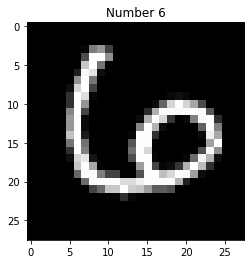

In [ ]:
#Example of data
i = np.random.randint(0,len(x_train))

fig = plt.figure(figsize=(4,4))
plt.title('Number {}'.format(y_train[i]))
plt.imshow(x_train[i], cmap='gray')

In [ ]:
batch_size = 64
x_t = DataLoader(train_data, batch_size = batch_size)
x_v = DataLoader(test_data, batch_size = batch_size)

In [ ]:
model = torch.nn.Sequential(
      nn.Linear(784,128),
      nn.ReLU(),
      nn.Dropout(p=0.2),
      nn.Linear(128,10),
      nn.Softmax()
)

learning_rate = 1e-2
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr = learning_rate)
model = model.to(device)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=128, out_features=10, bias=True)
  (4): Softmax(dim=None)
)


In [ ]:
def train(x_train, model, loss_fn, optim):
  total_loss = 0.0
  accuracy = 0.0
  size = len(x_train.dataset)
  for batch,(x,y) in enumerate(x_train):
    x = torch.flatten(x/255.0,start_dim=1)
    x,y = x.to(device), y.to(device)
    y_p = model(x)
    loss = loss_fn(y_p,y)
    total_loss +=loss.item()
    accuracy += (y_p.argmax(1)==y).type(torch.float).sum().item()
    optim.zero_grad()
    loss.backward()
    optim.step()
  total_loss = total_loss/size
  accuracy = accuracy/size
  return total_loss, accuracy

In [ ]:
def test(x_test, model, loss_fn):
  total_loss = 0.0
  accuracy = 0.0
  size = len(x_test.dataset)
  model.eval()
  with torch.no_grad():
    for batch,(x,y) in enumerate(x_test):
      x = torch.flatten(x/255.0,start_dim=1)
      x,y = x.to(device), y.to(device)
      pred = model(x)
      loss = loss_fn(pred,y)
      accuracy+= (pred.argmax(1)==y).type(torch.float).sum().item()
      total_loss+= loss.item()
  total_loss = total_loss/size
  accuracy = accuracy/size
  return total_loss,accuracy

In [ ]:
epoch = 100
train_loss =[]
train_acc = []
test_loss = []
test_acc = []

for i in range(0,epoch):
  loss,acc = train(x_t,model,loss_fn, optim)
  train_loss.append(loss)
  train_acc.append(acc)
  
  print("{}th iteration of training: Loss {} \t Accuracy {}".format(i,loss,acc*100))
  
  loss,acc = test(x_v, model, loss_fn)
  test_loss.append(loss)
  test_acc.append(acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0th iteration of training: Loss 0.023407317330439884 	 Accuracy 96.69666666666666
1th iteration of training: Loss 0.023387120789289475 	 Accuracy 96.84166666666667
2th iteration of training: Loss 0.023372158926725388 	 Accuracy 96.95333333333333
3th iteration of training: Loss 0.023354292380809785 	 Accuracy 97.04833333333333
4th iteration of training: Loss 0.023336345821619035 	 Accuracy 97.14666666666668
5th iteration of training: Loss 0.023318415067593256 	 Accuracy 97.23
6th iteration of training: Loss 0.023302950433890024 	 Accuracy 97.33666666666667
7th iteration of training: Loss 0.023288413975636163 	 Accuracy 97.42666666666666
8th iteration of training: Loss 0.02327356685201327 	 Accuracy 97.50833333333333
9th iteration of training: Loss 0.02325900177160899 	 Accuracy 97.575
10th iteration of training: Loss 0.023250272065401076 	 Accuracy 97.655
11th iteration of training: Loss 0.023239474455515545 	 Accuracy 97.705
12th iteration of training: Loss 0.023231984851757686 	 Accur

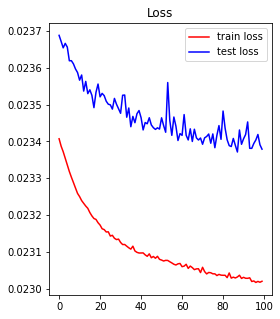

In [ ]:
plt.figure(figsize=(4,5))
plt.title("Loss")
plt.plot(train_loss, 'r', label ='train loss')
plt.plot(test_loss, 'b', label = 'test loss')
plt.legend()

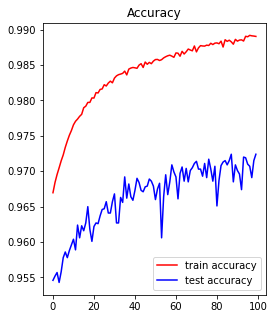

In [ ]:
plt.figure(figsize=(4,5))
plt.title("Accuracy")
plt.plot(train_acc, 'r', label ='train accuracy')
plt.plot(test_acc, 'b', label = 'test accuracy')
plt.legend()

In [ ]:
torch.eval()
with torch.no_grad():
  x = x_test.to(device)
  x = torch.flatten(x_test/255, start_dim=1 )
  pred = model(x)
  


torch.Size([10000, 28, 28])